# Naive Bayes(Simple but practical classifier)

注意：

* 之前的LR和SVC都基于线性假设，而NB基于贝叶斯理论。


* 考虑NB的基础，基本假设是各个维度上特征被分类的条件概率相对独立。因此，朴素贝叶斯会单独考虑每个维度上特征被分类的条件概率，并综合概率对特征向量作出分类预测。


* 看了下面的图就知道它只是去找概率最大的一个。

## 朴素贝叶斯的优缺点：

## 优点：广泛应用于文本分类，需估计的参数规模从幂指数级减少到线性量级（由于模型的假设独立性很强），节约内存和计算时间

## 缺点：也是由于独立性假设，它不能得到特征之间的相关性，因此不适用于特征关联性强的任务

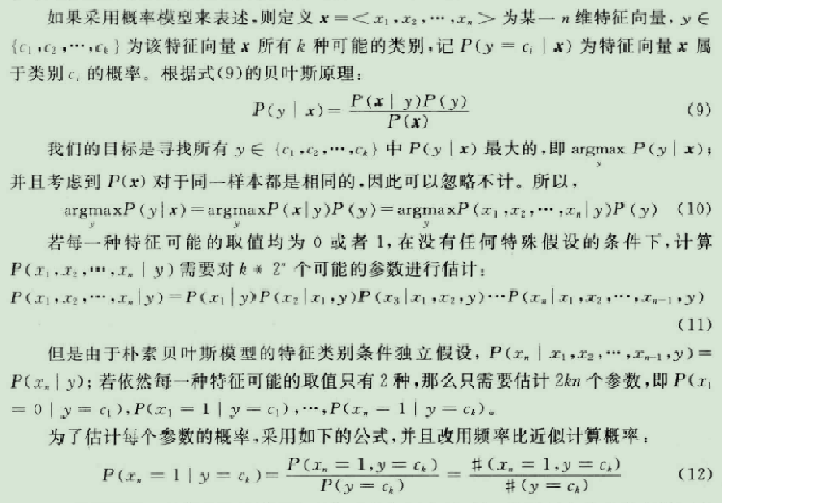

In [2]:
from IPython.display import Image
Image(filename = "NB.png")

## 文本分类任务：20类新闻文本

In [4]:
# first read the news data from sklearn.datasets
from sklearn.datasets import fetch_20newsgroups

# “与预存数据不同，它需要即时下载数据”
news = fetch_20newsgroups(subset = 'all')

# see data's size and a sample
print(len(news.data))
print(news.data[0])

18846
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [5]:
# second we split the samples to training testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size = 0.25, random_state = 33)

C:\Users\Administrator\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# third, how to transfer the text news to feature vector
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

In [7]:
# use Bayes
from sklearn.naive_bayes import MultinomialNB # 多项式贝叶斯？？？？？？
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# save the prediction
y_predict = mnb.predict(X_test)

# https://www.jianshu.com/p/8bddc16c2db7

# 这个好像原理不那么简单呐？？？（针对上面对MultinomialNB的疑惑）

注意和以前的两个分类器一样，我们在这里也用四个参数来评估朴素贝叶斯的性能。

In [8]:
from sklearn.metrics import classification_report
print 'The Accuracy of Nai ve Bayes Classifier is', mnb.score(X_test,y_test)
print classification_report(y_test, y_predict, target_names = news.target_names)

The Accuracy of Nai ve Bayes Classifier is 0.8397707979626485
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.86      0.86       201
           comp.graphics       0.59      0.86      0.70       250
 comp.os.ms-windows.misc       0.89      0.10      0.17       248
comp.sys.ibm.pc.hardware       0.60      0.88      0.72       240
   comp.sys.mac.hardware       0.93      0.78      0.85       242
          comp.windows.x       0.82      0.84      0.83       263
            misc.forsale       0.91      0.70      0.79       257
               rec.autos       0.89      0.89      0.89       238
         rec.motorcycles       0.98      0.92      0.95       276
      rec.sport.baseball       0.98      0.91      0.95       251
        rec.sport.hockey       0.93      0.99      0.96       233
               sci.crypt       0.86      0.98      0.91       238
         sci.electronics       0.85      0.88      0.86       249
             